![Elevvo Pathways](https://elevvo.tech/assets/nav_logo-5vkEKoZL.svg)
<h1>SQL-Based Analysis of Product Sales</h1>

In this notebook, we are processing <code>dataset.sqlite</code> from the Chinook Database.

In [1]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

After importing all necessary modules, we use a SQL query to find the top 10 selling products available on the Chinook Database.

<h2>Top Ten Selling Tracks</h2>

We join the necessary IDs available in the InvoiceLine table to their counterparts in the other tables which are Track, Album and Artist. 
When all tables are joined, we can easily filter out the information we need, which in this case are the top selling products.

In [2]:
conn = sqlite3.connect('dataset.sqlite')

query = '''
SELECT 
    a.Name as Artist,
    SUM(il.Quantity) as Track_Sold
FROM
    InvoiceLine il
JOIN
    Track t ON il.TrackId = t.TrackId
JOIN
    Album al ON t.AlbumId = al.AlbumId
JOIN
    Artist a ON a.ArtistId = al.ArtistId 
GROUP BY
    a.ArtistId
ORDER BY 
    Track_Sold DESC
LIMIT 10
'''

top_selling = pd.read_sql_query(query, conn)
top_selling

,Artist,Track_Sold
0,Iron Maiden,140
1,U2,107
2,Metallica,91
3,Led Zeppelin,87
4,Os Paralamas Do Sucesso,45
5,Deep Purple,44
6,Faith No More,42
7,Lost,41
8,Eric Clapton,40
9,R.E.M.,39


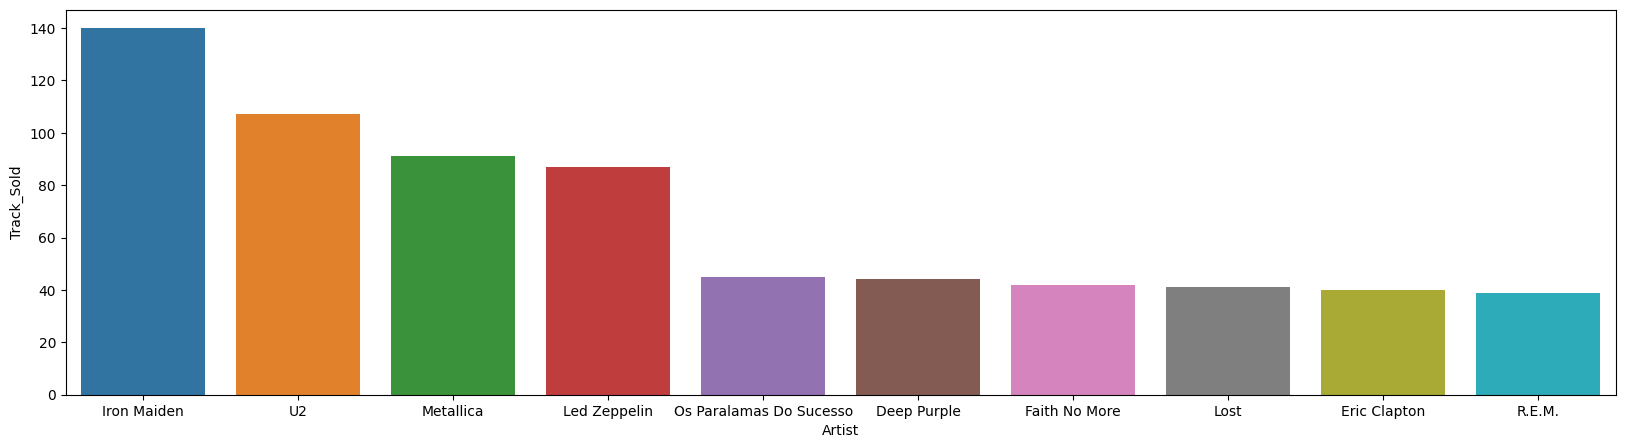

In [3]:
plt.figure(figsize=(20,5))
sns.barplot(data=top_selling, x='Artist', y='Track_Sold', hue='Artist')
plt.show()


We find that the track Iron Maiden is the most sold track.

<h2>Revenue per region</h2>

Now we find the total revenue of each region and filter out the top 5. We do this by joining customers and invoices. Then we group by countries and find the top 5 countries by ordering by total sales.

In [4]:
query = '''
SELECT 
    c.Country as Country ,
    SUM(i.Total) as Total_Sale
FROM
    Customer c
JOIN 
    Invoice i ON i.CustomerId = c.CustomerId
GROUP BY
    c.Country
ORDER BY
    Total_Sale DESC
LIMIT 5;
'''

revenue_per_region = pd.read_sql_query(query, conn)
revenue_per_region

,Country,Total_Sale
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48


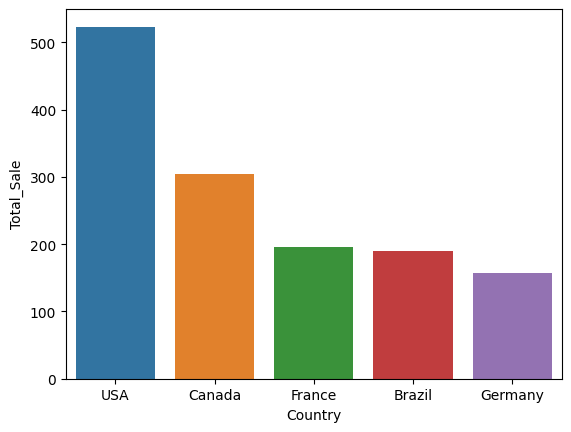

In [5]:
sns.barplot(data=revenue_per_region, x='Country', y='Total_Sale', hue='Country')
plt.show()

<h2>Monthly Revenue (2010-2013)</h2>

We use a SQL query to find the revenue of every month in each year. Using the DataFrame obtained from this result, we can generate seperate subplots for every year.

In [6]:
query = '''
SELECT 
    strftime('%Y', InvoiceDate) AS Year,
    strftime('%m', InvoiceDate) AS Month,
    SUM(Total) AS Revenue
FROM Invoice
GROUP BY Year, Month
ORDER BY Year, Month;
'''

monthly_performance = pd.read_sql_query(query, conn)

In [7]:
YEAR_2010 = monthly_performance[monthly_performance['Year'] == '2010']
YEAR_2011 = monthly_performance[monthly_performance['Year'] == '2011']
YEAR_2012 = monthly_performance[monthly_performance['Year'] == '2012']
YEAR_2013 = monthly_performance[monthly_performance['Year'] == '2013']

Text(0.5, 0.98, 'Monthly Revenue (2010-2013)')

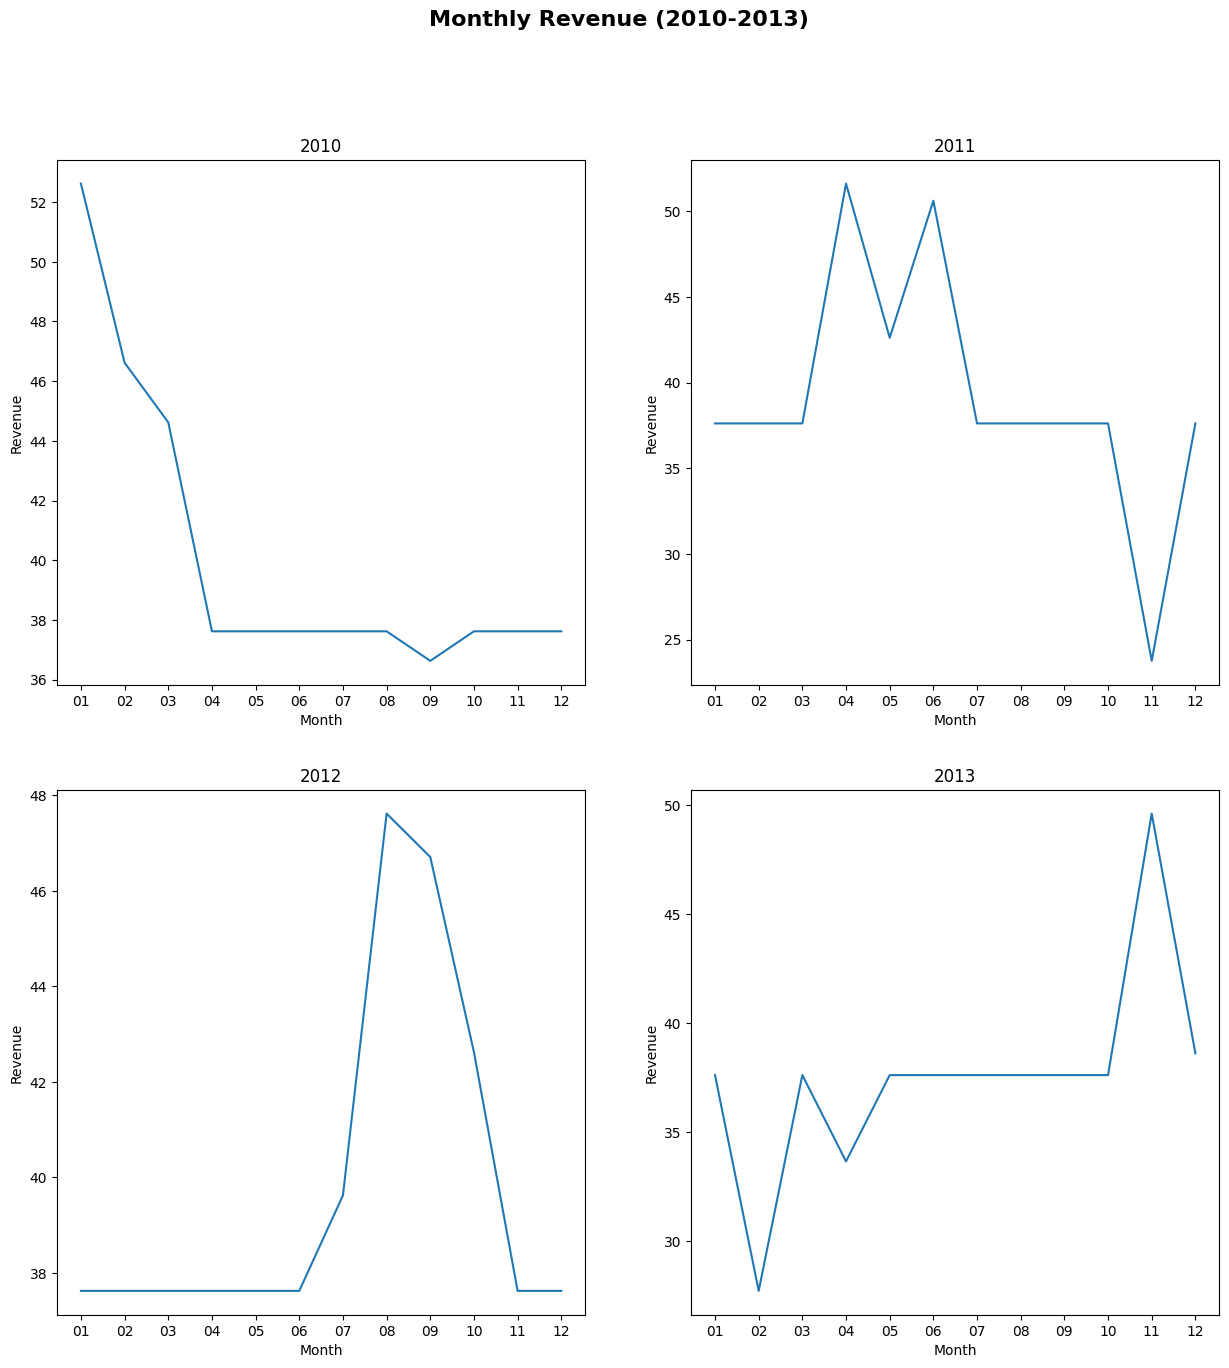

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.lineplot(data=YEAR_2010, x='Month', y='Revenue', ax=axes[0][0])
axes[0][0].set_title('2010')
sns.lineplot(data=YEAR_2011, x='Month', y='Revenue', ax=axes[0][1])
axes[0][1].set_title('2011')
sns.lineplot(data=YEAR_2012, x='Month', y='Revenue', ax=axes[1][0])
axes[1][0].set_title('2012')
sns.lineplot(data=YEAR_2013, x='Month', y='Revenue', ax=axes[1][1])
axes[1][1].set_title('2013')

fig.suptitle('Monthly Revenue (2010-2013)', fontsize=16, fontweight='bold')

In [9]:
conn.close()